<a href="https://colab.research.google.com/github/JoelMuhanguzi/deeplearningcoursework/blob/main/deeplearningcoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://www.dropbox.com/s/ogaa55azkt1fhbt/deep_learning_project.zip?dl=0"

--2022-09-02 18:15:24--  https://www.dropbox.com/s/ogaa55azkt1fhbt/deep_learning_project.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ogaa55azkt1fhbt/deep_learning_project.zip [following]
--2022-09-02 18:15:25--  https://www.dropbox.com/s/raw/ogaa55azkt1fhbt/deep_learning_project.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucad9edbb88c9717598906f5eeb6.dl.dropboxusercontent.com/cd/0/inline/BsPRSZdmTWvvsMtu3z6_2bH_ecbwzLyQrgb6j2Gviezisr4ZJAndJ6rvVk8jyctVlJBQOyywh2ha2ljURGhZoMP78N3V4X4CjK-aDECJ6wvBCGS8xlGXd9_iJP-63_uv_f3PV6WgUqEMrBBxVl9_mCP4cEZGlmW9R63MAm8h3v5B-Q/file# [following]
--2022-09-02 18:15:25--  https://ucad9edbb88c9717598906f5eeb6.dl.dropboxusercontent.com/cd/0/inline/BsPRSZdmTWvvsMtu3z6_2bH_ecbwzLyQrgb6

In [2]:
!unzip deep_learning_project.zip\?dl\=0

Archive:  deep_learning_project.zip?dl=0
  inflating: deep_learning_project/assignment_instructions.docx  
   creating: deep_learning_project/dataset1/
   creating: deep_learning_project/dataset1/known_images/
  inflating: deep_learning_project/dataset1/known_images/normal_0.png  
  inflating: deep_learning_project/dataset1/known_images/normal_1.png  
  inflating: deep_learning_project/dataset1/known_images/normal_10.png  
  inflating: deep_learning_project/dataset1/known_images/normal_101.png  
  inflating: deep_learning_project/dataset1/known_images/normal_102.png  
  inflating: deep_learning_project/dataset1/known_images/normal_103.png  
  inflating: deep_learning_project/dataset1/known_images/normal_104.png  
  inflating: deep_learning_project/dataset1/known_images/normal_105.png  
  inflating: deep_learning_project/dataset1/known_images/normal_106.png  
  inflating: deep_learning_project/dataset1/known_images/normal_107.png  
  inflating: deep_learning_project/dataset1/known_image

In [3]:
import os
import shutil
import glob

In [4]:
!pwd

/content


In [5]:
cd /content/deep_learning_project

/content/deep_learning_project


In [6]:
!mkdir dataset

In [7]:
cd dataset

/content/deep_learning_project/dataset


In [8]:
!mkdir normal sick

In [9]:
def sort_imgs():
    normal_dir = r"/content/deep_learning_project/dataset/normal"
    sick_dir = r"/content/deep_learning_project/dataset/sick"
    known_images = r"/content/deep_learning_project/dataset1/known_images"
    for jpgfile in glob.iglob(os.path.join(known_images, "*.png")):
        if "normal" in jpgfile:
            print(jpgfile)
            shutil.copy(jpgfile, normal_dir)

        elif "sick" in jpgfile:
            print(jpgfile)
            shutil.copy(jpgfile, sick_dir)

        else:
            print("unknown")
            pass

In [10]:
sort_imgs()

/content/deep_learning_project/dataset1/known_images/normal_44.png
/content/deep_learning_project/dataset1/known_images/normal_323.png
/content/deep_learning_project/dataset1/known_images/sick_316.png
/content/deep_learning_project/dataset1/known_images/sick_192.png
/content/deep_learning_project/dataset1/known_images/sick_89.png
/content/deep_learning_project/dataset1/known_images/sick_334.png
/content/deep_learning_project/dataset1/known_images/normal_243.png
/content/deep_learning_project/dataset1/known_images/sick_97.png
/content/deep_learning_project/dataset1/known_images/normal_320.png
/content/deep_learning_project/dataset1/known_images/sick_14.png
/content/deep_learning_project/dataset1/known_images/sick_243.png
/content/deep_learning_project/dataset1/known_images/sick_60.png
/content/deep_learning_project/dataset1/known_images/normal_22.png
/content/deep_learning_project/dataset1/known_images/normal_345.png
/content/deep_learning_project/dataset1/known_images/sick_139.png
/con

In [11]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import splitfolders
input_folder = r"/content/deep_learning_project/dataset"
output = r"/content/deep_learning_project/dataset_split"

splitfolders.ratio(input_folder, output, seed=42, ratio=(0.7, 0.2, 0.1))

Copying files: 715 files [00:00, 3185.98 files/s]


In [13]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [14]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/deep_learning_project/dataset_split'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


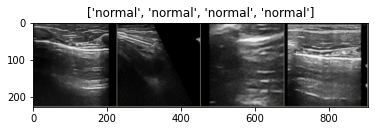

In [15]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [16]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [17]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [52]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [53]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=100)

Epoch 0/99
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.6474 Acc: 0.6974
val Loss: 0.2044 Acc: 0.9648

Epoch 1/99
----------
train Loss: 0.4267 Acc: 0.8297
val Loss: 0.2167 Acc: 0.9437

Epoch 2/99
----------
train Loss: 0.4732 Acc: 0.8277
val Loss: 0.1860 Acc: 0.9366

Epoch 3/99
----------
train Loss: 0.5671 Acc: 0.8056
val Loss: 0.1813 Acc: 0.9577

Epoch 4/99
----------
train Loss: 0.4239 Acc: 0.8297
val Loss: 0.1135 Acc: 0.9789

Epoch 5/99
----------
train Loss: 0.3970 Acc: 0.8357
val Loss: 0.1201 Acc: 0.9507

Epoch 6/99
----------
train Loss: 0.4423 Acc: 0.8437
val Loss: 0.1215 Acc: 0.9718

Epoch 7/99
----------
train Loss: 0.2948 Acc: 0.8878
val Loss: 0.1341 Acc: 0.9648

Epoch 8/99
----------
train Loss: 0.3042 Acc: 0.8677
val Loss: 0.1120 Acc: 0.9789

Epoch 9/99
----------
train Loss: 0.3125 Acc: 0.8737
val Loss: 0.0874 Acc: 0.9789

Epoch 10/99
----------
train Loss: 0.2901 Acc: 0.8878
val Loss: 0.1411 Acc: 0.9577

Epoch 11/99
----------
train Loss: 0.2700 Acc: 0.8778
val Loss: 0.1185 Acc: 0.9718

Epoch 12/99
----------
t

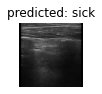

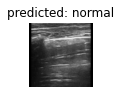

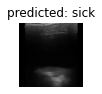

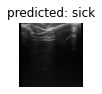

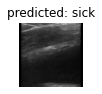

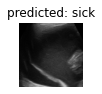

In [54]:
visualize_model(model_ft)

In [ ]:
print(model_ft.state_dict())

In [56]:
PATH = "/content/deep_learning_project/resnet18modelgputrained.pt"
torch.save(model_ft, PATH)

In [57]:
model = torch.load("/content/deep_learning_project/resnet18modelgputrained.pt", map_location=torch.device("cpu")) #GPU TRAINED
#model = torch.load("/content/model2.pt") #CPU TRAINED
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [59]:
from PIL import Image, ImageOps
import pandas as pd

#model = torch.load(PATH)
#model = torch.load("/content/model2.pt")

#model.eval()  # Set to eval mode to change behavior of Dropout, BatchNorm



transform = transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

classes = ["normal", "sick"]

lst = []
lst2 = []

unknown_images = "/content/deep_learning_project/dataset1/unknown_images"

for jpgfile in glob.iglob(os.path.join(unknown_images, "*.png")):

  img = Image.open(jpgfile)  # Load image as PIL.Image
  
  filename = os.path.basename(jpgfile)

  img = img.convert("RGB")
  x = transform(img)

  x = x.unsqueeze(0)  # Add batch dimension

  output = model(x)  # Forward pass
  pred = torch.argmax(output.data, 1)  # Get predicted class if multi-class classification

  lst.append(filename)
  lst2.append(classes[pred.item()])
  print(filename, classes[pred.item()])

df = pd.DataFrame({"files":lst,
                   "predictions":lst2})
print(df)
df.to_csv('unknown_image_classifer_gpures18.csv')


6.png sick
24.png sick
16.png sick
30.png sick
45.png normal
13.png normal
22.png sick
21.png normal
23.png normal
25.png normal
9.png normal
8.png sick
40.png sick
5.png normal
39.png normal
10.png sick
14.png sick
15.png normal
19.png normal
27.png normal
17.png normal
41.png normal
11.png normal
36.png sick
32.png sick
12.png sick
49.png normal
2.png sick
35.png normal
3.png normal
43.png normal
44.png sick
47.png normal
18.png sick
48.png sick
34.png sick
50.png sick
38.png sick
31.png normal
46.png sick
7.png sick
28.png sick
26.png sick
42.png sick
37.png normal
29.png normal
33.png normal
20.png sick
4.png sick
1.png normal
     files predictions
0    6.png        sick
1   24.png        sick
2   16.png        sick
3   30.png        sick
4   45.png      normal
5   13.png      normal
6   22.png        sick
7   21.png      normal
8   23.png      normal
9   25.png      normal
10   9.png      normal
11   8.png        sick
12  40.png        sick
13   5.png      normal
14  39.png      

In [60]:
!pwd

/content/deep_learning_project/dataset


In [61]:
from PIL import Image, ImageOps
import pandas as pd

#model = torch.load(PATH)
#model = torch.load("/content/model2.pt")

#model.eval()  # Set to eval mode to change behavior of Dropout, BatchNorm

transform = transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

classes = ["normal", "sick"]

lst3 = []

unknown_images = "/content/deep_learning_project/dataset2/images"
for jpgfile in glob.iglob(os.path.join(unknown_images, "*.png")):
  img = Image.open(jpgfile)  # Load image as PIL.Image
  
  filename = os.path.basename(jpgfile)

  img = img.convert("RGB")
  x = transform(img)
  x = x.unsqueeze(0)  # Add batch dimension

  output = model(x)  # Forward pass
  pred = torch.argmax(output.data, 1)  # Get predicted class if multi-class classification

  lst3.append(pred.item())

print(lst3)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [62]:
data = pd.read_csv("/content/deep_learning_project/dataset2/image_classes.csv")
y_true = data["diagnosis (0-Normal, 1-Sick)"].values.tolist()
y_pred = lst3

print(y_true)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [63]:
import sklearn.metrics
import numpy

r = sklearn.metrics.confusion_matrix(y_true, y_pred)

r = numpy.flip(r)

acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)

print(r)

[[104   8]
 [107   5]]


In [64]:
precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label= 1)
print(precision)

0.4928909952606635


In [65]:
recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label= 1)
print(recall)

0.9285714285714286


In [66]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=['Normal', 'Sick']))


Classification Report

              precision    recall  f1-score   support

      Normal       0.38      0.04      0.08       112
        Sick       0.49      0.93      0.64       112

    accuracy                           0.49       224
   macro avg       0.44      0.49      0.36       224
weighted avg       0.44      0.49      0.36       224

